# 2010 School Improvements Funds Exploration

Our data in this example is pulled from https://catalog.data.gov/dataset/school-improvement-2010-grants, and represents the recipients of several grants given for school improvements in 2010 and 2011. 

## I want to look at a few things.
    1) Distribution of funds - which states received the most aid, and are there relationships between this and population, # of schools, etc?
    2) Patterns in the grant sizes, if there are any. 


In [13]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Let's bring in the data and take a look at it first to see what we're working with here. 

In [19]:
df = pd.read_csv("2010grants.csv")
df.head()

,School Name,City,State,District Name,2010/11/Award Amount,Model Selected,Location
0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,$471014.00,Transformation,"200 MAIN ST\nSAVOONGA, AK 99769\n(63.6687, -17..."
1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,$520579.00,Transformation,"AKIACHAK 51100\nAKIACHAK, AK 99551\n(60.8911, ..."
2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,$449592.00,Transformation,"169 MAIN ST\nGAMBELL, AK 99742\n(63.7413, -171..."
3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,$641184.00,Transformation,"1775 WEST PARKS HWY\nWASILLA, AK 99654\n(61.57..."
4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,$399686.00,Transformation,"AKIAK 5227\nAKIAK, AK 99552\n(60.8879, -161.2)"


What I want to look at is a few things: 
    1) The distribution of # of individual improvements by State. 
    2) The distribution of total amount USD by State. 

We can notice that the 2010/11/Award Amount column has a $. This indicates it is probably a string. We can check this by using type, as well as pandas' value_counts().

In [16]:
df['2010/11/Award Amount'].apply(type).value_counts()

<class 'str'>      757
<class 'float'>     74
Name: 2010/11/Award Amount, dtype: int64

We have both floating point values and string values in the "Award Amount Column". Let's fix that. 

We use .replace() here with the regex=True argument so that the replacement will only be done on strings, not floats.

In [20]:
df['2010/11/Award Amount'] = df['2010/11/Award Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [21]:
# And check the values again.

df['2010/11/Award Amount'].apply(type).value_counts()

<class 'float'>    831
Name: 2010/11/Award Amount, dtype: int64

Pare down the data, and get it to include (relative to each state) the following: 
    1) The Total Grant Amount
    2) The Total # of Grants
    3) The Average Grant Amount

In [22]:
df_totals = df.groupby('State').sum()
df_totals['# of Grants'] = df['State'].value_counts()
df_totals['Average Individual Grant'] = df.groupby('State').mean()
df_totals.reset_index(inplace = True)

In [8]:
df_totals.head()

,State,2010/11/Award Amount,# of Grants,Average Individual Grant
0,AK,3607416.0,7,515345.142857
1,AL,2300782.0,11,209162.000000
2,AR,3936109.0,7,562301.285714
3,AZ,13181345.0,19,693755.000000
4,CA,20286824.0,92,220508.956522


Take a look at the top 10 recipient states for total amounts. 

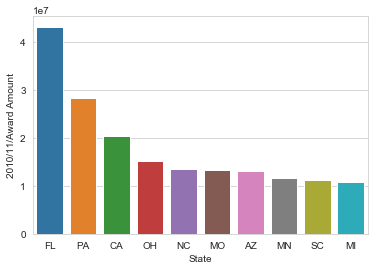

In [9]:
sns.barplot(x='State', y='2010/11/Award Amount', data = df_totals.nlargest(10, '2010/11/Award Amount'))

And then the top 10 states for # of grants.

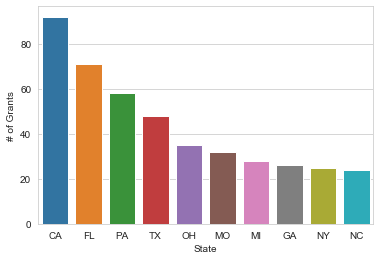

In [10]:
sns.barplot(x='State', y='# of Grants', data = df_totals.nlargest(10, '# of Grants'))

And then the top 10 for average grant size. 

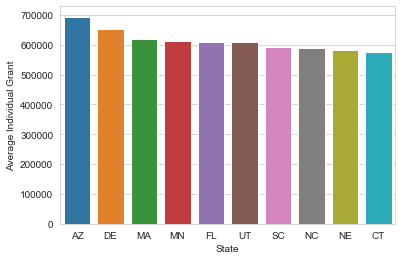

In [11]:
sns.barplot(x='State', y='Average Individual Grant', data = df_totals.nlargest(10, 'Average Individual Grant'))

I want to see if there's a correlation between average grant size and the total amount of grant money received. Let's graph those vs. one another and see how it goes. 

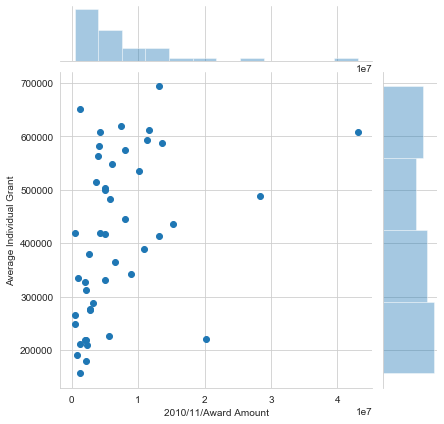

In [42]:
sns.jointplot(x='2010/11/Award Amount', y='Average Individual Grant', kind='scatter', data = df_totals)

That's cool, but doesn't have a line, and looks like there are some offliers that might skew the line. Maybe a density plot?

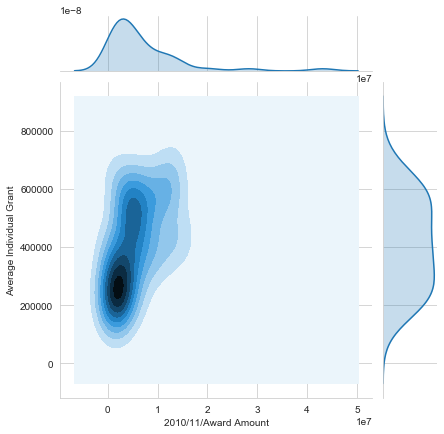

In [43]:
sns.jointplot(x='2010/11/Award Amount', y='Average Individual Grant', kind='kde', data = df_totals)